In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. 读取数据，数据预处理

In [2]:
df = pd.read_csv(f'../Dataset/Final_Dataset_2.csv')
df = df.drop(columns=['Time', 'Primary Intent'])
df.head()

,User,ID,Hotas_Axis_X,Hotas_Axis_Y,Hotas_Axis_Z,Hotas_Btn_Create_Fleet,Hotas_Btn_Select_UAV1,Hotas_Btn_Select_UAV2,Hotas_Btn_Select_UAV3,Hotas_Btn_Select_UAV4,...,Target_Area_State,Target_Area_Pos_X,Target_Area_Pos_Y,Trapped_People_State,Trapped_People_Pos_X,Trapped_People_Pos_Y,Gaze point X,Gaze point Y,AOI,Secondary Intent
0,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,-1.0,-1.0,False,-1.0,-1.0,2067.0,1195.0,4,Intent_0_0
1,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,-1.0,-1.0,False,-1.0,-1.0,2046.0,1204.0,4,Intent_0_0
2,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,-1.0,-1.0,False,-1.0,-1.0,2046.0,1200.0,4,Intent_0_0
3,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,-1.0,-1.0,False,-1.0,-1.0,2053.0,1221.0,4,Intent_0_0
4,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,-1.0,-1.0,False,-1.0,-1.0,2068.0,1209.0,4,Intent_0_0


**重新梳理意图标签**

In [3]:
df['New Intent'] = None
for index, row in df.iterrows():
    if row['Secondary Intent'] == 'Intent_0_0':
        df.at[index, 'New Intent'] = '00'
    if row['Secondary Intent'] == 'Intent_1_1':
        df.at[index, 'New Intent'] = '01'
    if row['Secondary Intent'] == 'Intent_1_2':
        df.at[index, 'New Intent'] = '02'
    if row['Secondary Intent'] == 'Intent_2_1' or row['Secondary Intent'] == 'Intent_3_2':
        df.at[index, 'New Intent'] = '03'
    if row['Secondary Intent'] == 'Intent_2_2':
        df.at[index, 'New Intent'] = '04'
    if row['Secondary Intent'] == 'Intent_2_3':
        df.at[index, 'New Intent'] = '05'
    if row['Secondary Intent'] == 'Intent_3_1':
        df.at[index, 'New Intent'] = '06'
    if row['Secondary Intent'] == 'Intent_3_3':
        df.at[index, 'New Intent'] = '07'
    if row['Secondary Intent'] == 'Intent_3_4':
        df.at[index, 'New Intent'] = '08'
    if row['Secondary Intent'] == 'Intent_3_5':
        df.at[index, 'New Intent'] = '09'
    if row['Secondary Intent'] == 'Intent_4_1' or row['Secondary Intent'] == 'Intent_5_1':
        df.at[index, 'New Intent'] = '10'
    if row['Secondary Intent'] == 'Intent_4_2':
        df.at[index, 'New Intent'] = '11'
    if row['Secondary Intent'] == 'Intent_4_3':
        df.at[index, 'New Intent'] = '12'
    if row['Secondary Intent'] == 'Intent_4_4':
        df.at[index, 'New Intent'] = '13'
    if row['Secondary Intent'] == 'Intent_5_2':
        df.at[index, 'New Intent'] = '14'
    if row['Secondary Intent'] == 'Intent_5_3':
        df.at[index, 'New Intent'] = '15'
    if row['Secondary Intent'] == 'Intent_5_4':
        df.at[index, 'New Intent'] = '16'

df.drop(columns=['Secondary Intent'], inplace=True)
df.rename(columns={'New Intent': 'Intent'}, inplace=True)
df.head()

,User,ID,Hotas_Axis_X,Hotas_Axis_Y,Hotas_Axis_Z,Hotas_Btn_Create_Fleet,Hotas_Btn_Select_UAV1,Hotas_Btn_Select_UAV2,Hotas_Btn_Select_UAV3,Hotas_Btn_Select_UAV4,...,Target_Area_State,Target_Area_Pos_X,Target_Area_Pos_Y,Trapped_People_State,Trapped_People_Pos_X,Trapped_People_Pos_Y,Gaze point X,Gaze point Y,AOI,Intent
0,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,-1.0,-1.0,False,-1.0,-1.0,2067.0,1195.0,4,00
1,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,-1.0,-1.0,False,-1.0,-1.0,2046.0,1204.0,4,00
2,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,-1.0,-1.0,False,-1.0,-1.0,2046.0,1200.0,4,00
3,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,-1.0,-1.0,False,-1.0,-1.0,2053.0,1221.0,4,00
4,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,-1.0,-1.0,False,-1.0,-1.0,2068.0,1209.0,4,00


**One-Hot编码**

In [4]:
# 离散特征变量使用One-Hot编码，通过DataFrame实现
df = pd.get_dummies(df, columns=['Flight_Fleet_State', 'Flight_Fly_Mode', 'UAV_Selected_Now', 'UAV1_Task_State', 'UAV2_Task_State',
                                 'UAV3_Task_State', 'UAV4_Task_State', 'AOI'])
df['Intent'] = df.pop('Intent')

df.head()

,User,ID,Hotas_Axis_X,Hotas_Axis_Y,Hotas_Axis_Z,Hotas_Btn_Create_Fleet,Hotas_Btn_Select_UAV1,Hotas_Btn_Select_UAV2,Hotas_Btn_Select_UAV3,Hotas_Btn_Select_UAV4,...,UAV4_Task_State_2,UAV4_Task_State_3,AOI_0,AOI_1,AOI_2,AOI_3,AOI_4,AOI_5,AOI_6,Intent
0,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,00
1,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,00
2,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,00
3,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,00
4,1,1,0.0,0.0,-0.307087,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,00


**归一化数据**

In [5]:
df.loc[:, 'Hotas_Axis_X']  = (df['Hotas_Axis_X']+1)/2
df.loc[:, 'Hotas_Axis_Y']  = (df['Hotas_Axis_Y']+1)/2
df.loc[:, 'Hotas_Axis_Z']  = (df['Hotas_Axis_Z']+1)/2

df.loc[:, 'Flight_Pos_X']  = (df['Flight_Pos_X']-df['Flight_Pos_X'].min())/(df['Flight_Pos_X'].max()-df['Flight_Pos_X'].min())
df.loc[:, 'Flight_Pos_Y']  = (df['Flight_Pos_Y']-df['Flight_Pos_Y'].min())/(df['Flight_Pos_Y'].max()-df['Flight_Pos_Y'].min())
df.loc[:, 'Flight_Speed']  = (df['Flight_Speed']-df['Flight_Speed'].min())/(df['Flight_Speed'].max()-df['Flight_Speed'].min())
df.loc[:, 'Flight_Height']  = (df['Flight_Height']-df['Flight_Height'].min())/(df['Flight_Height'].max()-df['Flight_Height'].min())
df.loc[:, 'Flight_Heading']  = (df['Flight_Heading']-df['Flight_Heading'].min())/(df['Flight_Heading'].max()-df['Flight_Heading'].min())

df.loc[:, 'UAV1_Pos_X']  = df['UAV1_Pos_X']/3840
df.loc[:, 'UAV1_Pos_Y']  = df['UAV1_Pos_Y']/2160
df.loc[:, 'UAV2_Pos_X']  = df['UAV2_Pos_X']/3840
df.loc[:, 'UAV2_Pos_Y']  = df['UAV2_Pos_Y']/2160
df.loc[:, 'UAV3_Pos_X']  = df['UAV3_Pos_X']/3840
df.loc[:, 'UAV3_Pos_Y']  = df['UAV3_Pos_Y']/2160
df.loc[:, 'UAV4_Pos_X']  = df['UAV4_Pos_X']/3840
df.loc[:, 'UAV4_Pos_Y']  = df['UAV4_Pos_Y']/2160

df.loc[:, 'Target_Area_Pos_X']  = (df['Target_Area_Pos_X']-df['Target_Area_Pos_X'].min())/(df['Target_Area_Pos_X'].max()-df['Target_Area_Pos_X'].min())
df.loc[:, 'Target_Area_Pos_Y']  = (df['Target_Area_Pos_Y']-df['Target_Area_Pos_Y'].min())/(df['Target_Area_Pos_Y'].max()-df['Target_Area_Pos_Y'].min())
df.loc[:, 'Trapped_People_Pos_X']  = (df['Trapped_People_Pos_X']-df['Trapped_People_Pos_X'].min())/(df['Trapped_People_Pos_X'].max()-df['Trapped_People_Pos_X'].min())
df.loc[:, 'Trapped_People_Pos_Y']  = (df['Trapped_People_Pos_Y']-df['Trapped_People_Pos_Y'].min())/(df['Trapped_People_Pos_Y'].max()-df['Trapped_People_Pos_Y'].min())

df.loc[:, 'Gaze point X']  = df['Gaze point X']/3840
df.loc[:, 'Gaze point Y']  = df['Gaze point Y']/2160

pd.set_option('display.max_columns', None)
df.head()

,User,ID,Hotas_Axis_X,Hotas_Axis_Y,Hotas_Axis_Z,Hotas_Btn_Create_Fleet,Hotas_Btn_Select_UAV1,Hotas_Btn_Select_UAV2,Hotas_Btn_Select_UAV3,Hotas_Btn_Select_UAV4,Hotas_Btn_Assign_Up,Hotas_Btn_Assign_Down,Hotas_Btn_Assign_Left,Hotas_Btn_Assign_Right,Hotas_Btn_Change_Mode,Hotas_Btn_Open_UAV_Sensor,Hotas_Btn_Open_Helicopter_Sensor,Hotas_Btn_Select_Normal,Hotas_Btn_Select_Fire,Hotas_Btn_Select_Person,Hotas_Btn_Submit_Result,Hotas_Btn_Area_Assign,Flight_Pos_X,Flight_Pos_Y,Flight_Speed,Flight_Height,Flight_Heading,Flight_Sensor,UAV1_Pos_X,UAV1_Pos_Y,UAV2_Pos_X,UAV2_Pos_Y,UAV3_Pos_X,UAV3_Pos_Y,UAV4_Pos_X,UAV4_Pos_Y,UAV_Sensor_State,Task_List_State,Target_Area_State,Target_Area_Pos_X,Target_Area_Pos_Y,Trapped_People_State,Trapped_People_Pos_X,Trapped_People_Pos_Y,Gaze point X,Gaze point Y,Flight_Fleet_State_0,Flight_Fleet_State_1,Flight_Fleet_State_2,Flight_Fly_Mode_0,Flight_Fly_Mode_1,UAV_Selected_Now_-1.0,UAV_Selected_Now_1.0,UAV_Selected_Now_2.0,UAV_Selected_Now_3.0,UAV_Selected_Now_4.0,UAV1_Task_State_0,UAV1_Task_State_1,UAV1_Task_State_2,UAV1_Task_State_3,UAV2_Task_State_0,UAV2_Task_State_1,UAV2_Task_State_2,UAV2_Task_State_3,UAV3_Task_State_0,UAV3_Task_State_1,UAV3_Task_State_2,UAV3_Task_State_3,UAV4_Task_State_0,UAV4_Task_State_1,UAV4_Task_State_2,UAV4_Task_State_3,AOI_0,AOI_1,AOI_2,AOI_3,AOI_4,AOI_5,AOI_6,Intent
0,1,1,0.5,0.5,0.346457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.450056,0.128048,0.0,0.40634,0.000016,False,0.495825,0.1839,0.534825,0.1839,0.495825,0.130567,0.534825,0.130567,False,True,False,0.0,0.0,False,0.0,0.0,0.538281,0.553241,True,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,00
1,1,1,0.5,0.5,0.346457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.450056,0.128048,0.0,0.40634,0.000016,False,0.495825,0.1839,0.534825,0.1839,0.495825,0.130567,0.534825,0.130567,False,True,False,0.0,0.0,False,0.0,0.0,0.532813,0.557407,True,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,00
2,1,1,0.5,0.5,0.346457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.450056,0.128048,0.0,0.40634,0.000016,False,0.495825,0.1839,0.534825,0.1839,0.495825,0.130567,0.534825,0.130567,False,True,False,0.0,0.0,False,0.0,0.0,0.532813,0.555556,True,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,00
3,1,1,0.5,0.5,0.346457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.450056,0.128048,0.0,0.40634,0.000016,False,0.495825,0.1839,0.534825,0.1839,0.495825,0.130567,0.534825,0.130567,False,True,False,0.0,0.0,False,0.0,0.0,0.534635,0.565278,True,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,00
4,1,1,0.5,0.5,0.346457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.450056,0.128048,0.0,0.40634,0.000016,False,0.495825,0.1839,0.534825,0.1839,0.495825,0.130567,0.534825,0.130567,False,True,False,0.0,0.0,False,0.0,0.0,0.538542,0.559722,True,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,00


# 2. 拆分训练集和测试集，划分时间窗口

In [6]:
# 时间窗口
T = 1

def CreateTimeSequence(df):
    X = []
    Y = []
    # 根据test_id划分DataFrame
    grouped = df.groupby('ID')
    for _, group in grouped:
        for i in range(len(group) - T):
            # 提取滑动窗口
            window = group.iloc[i:i + T]
            
            if int(window.iloc[0]['Intent']) > 0:
                # 提取特征并展开成一维向量
                features = window.drop(columns=['ID', 'User', 'Intent']).values.flatten()
                # 滑动窗口的最后一行作为标签
                label = window.iloc[-1]['Intent']

                X.append(features)
                Y.append(label)
    
    return X, Y

In [7]:
# 设置训练集和测试集
train_ids = [i for i in range(1, 51) if i % 5 != 0]
test_ids = [i for i in range(1, 51) if i % 5 == 0]
print("train IDs:", train_ids)
print("test IDs:", test_ids)

df_train = df[df['ID'].isin(train_ids)]
df_test = df[df['ID'].isin(test_ids)]
print(df_train.shape, df_test.shape)

train IDs: [1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49]
test IDs: [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
(941603, 80) (233086, 80)


In [8]:
X_train, Y_train = CreateTimeSequence(df_train)
X_test, Y_test = CreateTimeSequence(df_test)
print("完成拆分")

完成拆分


In [9]:
print(len(X_train), len(Y_train), len(X_test), len(Y_test))

828108 828108 212061 212061


# 3. 训练模型

In [10]:
# 建立和训练KNN模型
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

# 4. 验证模型

In [11]:

# def knn_predict_in_chunks(knn, X_test, chunk_size=1000):
#     Y_pred = []
#     for X_chunk in X_test:
#         n_samples = len(X_chunk)
#         print(n_samples)
#         for start in range(0, n_samples, chunk_size):
#             end = min(start + chunk_size, n_samples)
#             Y_pred_chunk = knn.predict(X_chunk[start:end])
#             Y_pred.extend(Y_pred_chunk)
    
#     return np.array(Y_pred)

# # 分块预测
# Y_pred = knn_predict_in_chunks(knn, X_test)
Y_pred = rf.predict(X_test)

# 5. 混淆矩阵

In [12]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support

Confusion Matrix:
[[ 1370     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [   21  1734     0     0     0     0     0     0     0   142     0     0
      0     0     0     0]
 [    0     0  4097    27     0   411     5     0     0    39     0     0
      6     0     0     0]
 [    0     0     4 18487   401   154     0     0     0     0     0     0
      0     0     0     0]
 [    0     0     0  1473  1064     9     0     0     0     2     0     0
      0    14     0     0]
 [    0    34  6956    14     0 61683     0     0     2   320   157     0
     66     0     0     6]
 [    0     0    11     0     0     5  2048     0     0     0     0     0
      0     0     0     0]
 [    0     0     0    83     0     0     0  3439  1209     0     0     0
      0     0     0     0]
 [    0     0    16     1     0    19    15  1207  3805     0     0     0
      1     0     0     0]
 [    0   159    71     0     0    14     0     0     0 41522     0     0

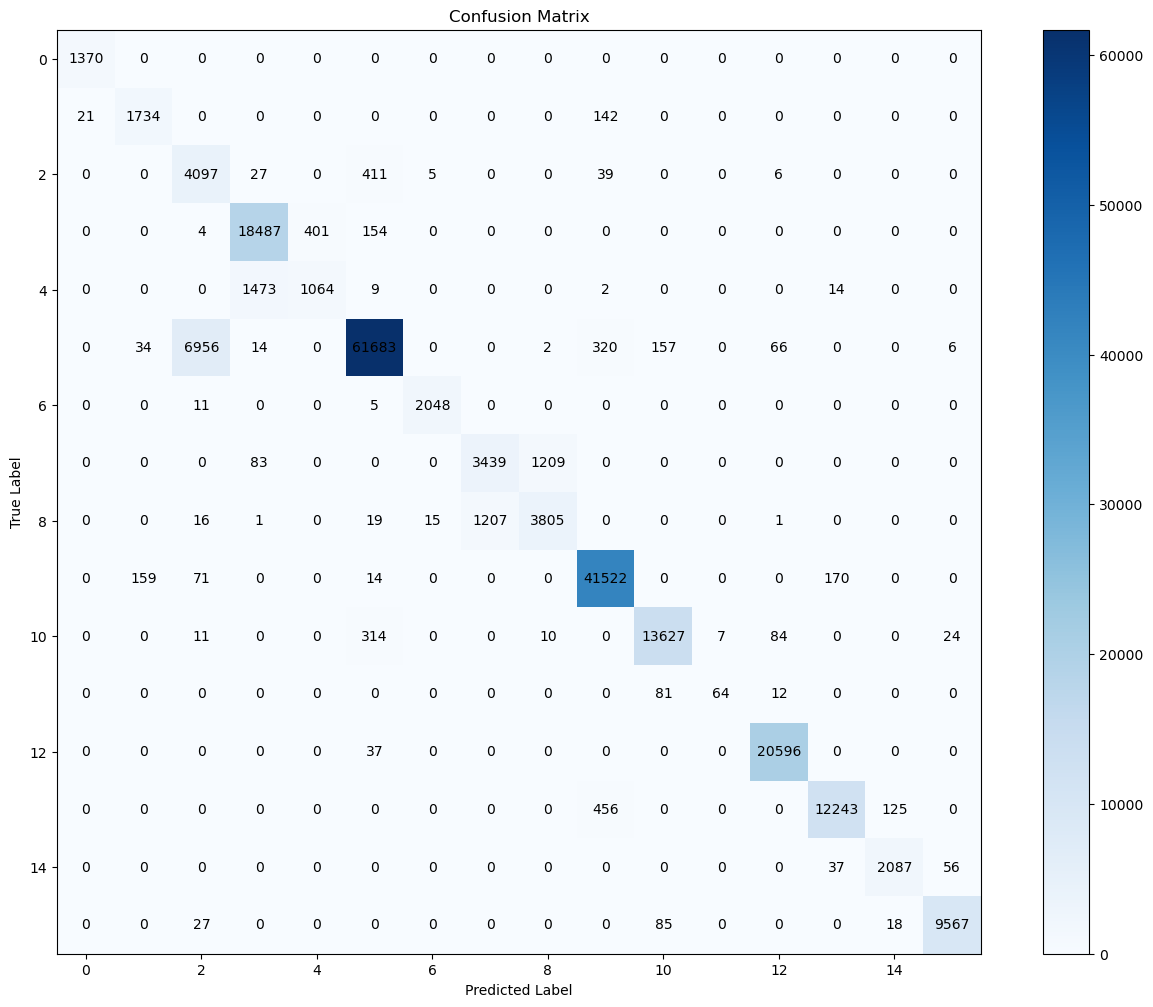

In [13]:
# 混淆矩阵
cm = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(cm)

# 4. 绘制混淆矩阵
num_classes = 16

plt.figure(figsize=(16, 12))
cmap = plt.cm.Blues
plt.imshow(cm, interpolation='nearest', cmap=cmap)

# 添加文字标签
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, f'{cm[i, j]}', ha='center', va='center', color='black')

# 添加颜色条
plt.colorbar()

# 添加标题和标签
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [14]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 计算总体的准确率、精确率、召回率、F1分数
def calculate_metrics_overall_by_sklearn(matrix):
    # 提取真实标签和预测标签
    true_labels = []
    pred_labels = []

    num_classes = matrix.shape[0]

    for i in range(num_classes):
        for j in range(num_classes):
            true_labels.extend([i] * matrix[i, j])
            pred_labels.extend([j] * matrix[i, j])

    # 计算总体的准确率、精确率、召回率和F1分数
    overall_accuracy = accuracy_score(true_labels, pred_labels)
    overall_precision = precision_score(true_labels, pred_labels, average='macro')
    overall_recall = recall_score(true_labels, pred_labels, average='macro')
    overall_f1 = f1_score(true_labels, pred_labels, average='macro')

    return overall_precision, overall_recall, overall_f1, overall_accuracy

real_overall_precision, real_overall_recall, real_overall_f1_score, real_overall_accuracy = calculate_metrics_overall_by_sklearn(cm)
print("总体精确率（Precision）: ", real_overall_precision)
print("总体召回率（Recall）: ", real_overall_recall)
print("总体F1 分数（F1 Score）: ", real_overall_f1_score)
print("总体准确率（Accuracy）: ", real_overall_accuracy)

总体精确率（Precision）:  0.8829062062607952
总体召回率（Recall）:  0.8636032130504554
总体F1 分数（F1 Score）:  0.8576586673106005
总体准确率（Accuracy）:  0.9310198480625858
